In [1]:

# import os
# import numpy as np
# import torch
# from scipy.signal import hilbert
# import matplotlib.pyplot as plt

# # Define Wigner-Ville Distribution (WVD) and Gaussian Smoothing functions
# def wigner_ville_distribution(signal):
#     N = signal.shape[-1]
#     WVD = torch.zeros((N, N), dtype=torch.complex64, device=signal.device)
    
#     indices = torch.arange(N, device=signal.device)
#     for n in range(N):
#         shifted_indices = (indices + n) % N
#         WVD[:, n] = signal * torch.conj(signal[shifted_indices])
    
#     WVD = torch.fft.fft(WVD, dim=0)
    
#     return WVD

# def gaussian_smoothing(wvd, alpha, beta):
#     time_size, freq_size = wvd.shape
#     t = torch.linspace(-1, 1, time_size, device=wvd.device)
#     f = torch.linspace(-1, 1, freq_size, device=wvd.device)
#     T, F = torch.meshgrid(t, f, indexing='ij')
    
#     gauss_filter = torch.exp(-T**2 / (2 * alpha**2) - F**2 / (2 * beta**2))
#     gauss_filter = torch.fft.fftshift(gauss_filter)
    
#     wvd_fft = torch.fft.fft2(wvd)
#     gauss_filter_fft = torch.fft.fft2(gauss_filter)
    
#     smoothed_wvd_fft = wvd_fft * gauss_filter_fft
#     smoothed_wvd = torch.fft.ifft2(smoothed_wvd_fft)
    
#     return smoothed_wvd



# def smoothed_wigner_ville_distribution(signal, alpha, beta):
#     WVD = wigner_ville_distribution(signal)
#     smoothed_WVD = gaussian_smoothing(WVD, alpha, beta)
#     return smoothed_WVD

# # Define function to calculate and save sWVD
# def calculate_and_save_swvd(radar_root_dir, swvd_save_dir, radar_range=[0,1488], alpha=0.5, beta=0.5):
#     classes = sorted(os.listdir(radar_root_dir))
    
#     if not os.path.exists(swvd_save_dir):
#         os.makedirs(swvd_save_dir)
    
#     for cls in classes:
#         radar_dir = os.path.join(radar_root_dir, cls)
#         swvd_dir = os.path.join(swvd_save_dir, cls)
        
#         if not os.path.exists(swvd_dir):
#             os.makedirs(swvd_dir)
        
#         radar_files = sorted([f for f in os.listdir(radar_dir) if f.endswith('npy')])
        
#         for radar_file in radar_files:
#             radar_path = os.path.join(radar_dir, radar_file)
#             swvd_path = os.path.join(swvd_dir, os.path.splitext(radar_file)[0] + '.png')
            
#             radar = np.load(radar_path)
#             radar = torch.tensor(radar, dtype=torch.float32).reshape(-1, 1488)
#             radar = radar[:, radar_range[0]:radar_range[1]]
            
#             with torch.no_grad():
#                 signal = torch.tensor(hilbert(radar.squeeze().cpu().numpy()), dtype=torch.complex64).to('cuda')
#                 sWVD = smoothed_wigner_ville_distribution(signal, alpha, beta).to('cpu')
            
#             sWVD_np = np.abs(sWVD.cpu().numpy())

#             # 디버깅: sWVD_np의 형상 출력
#             # print(f"sWVD_np shape for {radar_file}: {sWVD_np.shape}")

#             if sWVD_np.ndim == 2:  # 2차원 배열인지 확인
#                 freq_range = np.linspace(0, 1, sWVD_np.shape[0])
#                 extent = [0, sWVD_np.shape[1], freq_range[0], freq_range[-1]]
                
#                 # Save as image
#                 plt.imshow(sWVD_np, aspect='auto', extent=extent, cmap='jet', origin='lower')
#                 plt.colorbar()
#                 plt.title(f'sWVD for {radar_file}')
#                 plt.savefig(swvd_path)
#                 plt.close()
                
#                 # print(f"Saved sWVD image for {radar_file} in {swvd_dir}")
#             else:
#                 print(f"Unexpected sWVD shape for {radar_file}: {sWVD_np.shape}")

# # Example usage
# radar_root_dir = '/home/yunkwan/project/radarclip/data_train/radar'
# swvd_save_dir = '/home/yunkwan/project/radarclip/data_train/swvd_folder_image/random'
# calculate_and_save_swvd(radar_root_dir, swvd_save_dir, radar_range=[100,1000])


In [2]:
# import os
# import numpy as np
# import torch
# from scipy.signal import hilbert

# # Define Wigner-Ville Distribution (WVD) and Gaussian Smoothing functions
# def wigner_ville_distribution(signal):
#     N = signal.shape[-1]
#     WVD = torch.zeros((N, N), dtype=torch.complex64, device=signal.device)
    
#     for n in range(N):
#         shifted_signal = torch.roll(signal, shifts=n)
#         WVD[:, n] = signal * torch.conj(shifted_signal)
    
#     WVD = torch.fft.fft(WVD, dim=1)
    
#     return WVD

# def gaussian_smoothing(wvd, alpha, beta):
#     time_size, freq_size = wvd.shape
#     t = torch.linspace(-1, 1, time_size, device=wvd.device)
#     f = torch.linspace(-1, 1, freq_size, device=wvd.device)
#     T, F = torch.meshgrid(t, f, indexing='ij')
    
#     gauss_filter = torch.exp(-T**2 / (2 * alpha**2) - F**2 / (2 * beta**2))
#     gauss_filter = torch.fft.fftshift(gauss_filter)
    
#     wvd_fft = torch.fft.fft2(wvd)
#     gauss_filter_fft = torch.fft.fft2(gauss_filter)
    
#     smoothed_wvd_fft = wvd_fft * gauss_filter_fft
#     smoothed_wvd = torch.fft.ifft2(smoothed_wvd_fft)
    
#     return smoothed_wvd

# def smoothed_wigner_ville_distribution(signal, alpha, beta):
#     WVD = wigner_ville_distribution(signal)
#     smoothed_WVD = gaussian_smoothing(WVD, alpha, beta)
#     return smoothed_WVD.T

# # Define function to calculate and save sWVD
# def calculate_and_save_swvd(radar_root_dir, swvd_save_dir, radar_range=[0,1488], alpha=0.005, beta=0.005):
#     classes = sorted(os.listdir(radar_root_dir))
    
#     if not os.path.exists(swvd_save_dir):
#         os.makedirs(swvd_save_dir)
    
#     for cls in classes:
#         radar_dir = os.path.join(radar_root_dir, cls)
#         swvd_dir = os.path.join(swvd_save_dir, cls)
        
#         if not os.path.exists(swvd_dir):
#             os.makedirs(swvd_dir)
        
#         radar_files = sorted([f for f in os.listdir(radar_dir) if f.endswith('npy')])
        
#         for radar_file in radar_files:
#             radar_path = os.path.join(radar_dir, radar_file)
#             swvd_path = os.path.join(swvd_dir, radar_file)
            
#             radar = np.load(radar_path)
#             radar = torch.tensor(radar, dtype=torch.float32).reshape(-1, 1488)
#             radar = radar[:, radar_range[0]:radar_range[1]]
            
#             with torch.no_grad():
#                 signal = torch.tensor(hilbert(radar.squeeze().cpu().numpy()), dtype=torch.complex64).to('cuda')
#                 sWVD = smoothed_wigner_ville_distribution(signal, alpha, beta).to('cpu')
                
#             np.save(swvd_path, sWVD.cpu().numpy())
#             # print(f"Saved sWVD for {radar_file} in {swvd_dir}")

# # Example usage
# radar_root_dir = '/home/yunkwan/project/radarclip/data_train/radar'
# swvd_save_dir = '/home/yunkwan/project/radarclip/data_train/swvd_folder'
# radar_range =[200,202]
# calculate_and_save_swvd(radar_root_dir, swvd_save_dir,radar_range =radar_range)




In [3]:

import os
import shutil
import re

# 폴더 경로 설정
image_folder = '/home/yunkwan/project/radarclip/data_train/image'
radar_folder = '/home/yunkwan/project/radarclip/data_train/radar'
backup_folder = '/home/yunkwan/project/radarclip/data_train/radar/backup'

# 백업 폴더가 없으면 생성
os.makedirs(backup_folder, exist_ok=True)

# 파일 이름에서 숫자만 추출하는 함수
def extract_number(filename):
    match = re.search(r'\d+', filename)
    return match.group(0) if match else None

# 이미지 폴더와 레이더 폴더의 파일 이름 목록에서 숫자만 추출하여 가져오기
image_files = set(extract_number(f) for f in os.listdir(image_folder))
radar_files = os.listdir(radar_folder)

# 레이더 폴더의 파일 이름에서 숫자를 추출하여 이미지 폴더에 없는 경우 제거
for radar_file in radar_files:
    radar_file_number = extract_number(radar_file)
    if radar_file_number and radar_file_number not in image_files:
        radar_file_path = os.path.join(radar_folder, radar_file)
        backup_file_path = os.path.join(backup_folder, radar_file)
        os.remove(radar_file_path)
        print(f'Removed: {radar_file_path}')
        # shutil.move(radar_file_path, backup_file_path)
        # print(f'Moved: {radar_file_path} to {backup_file_path}')
        


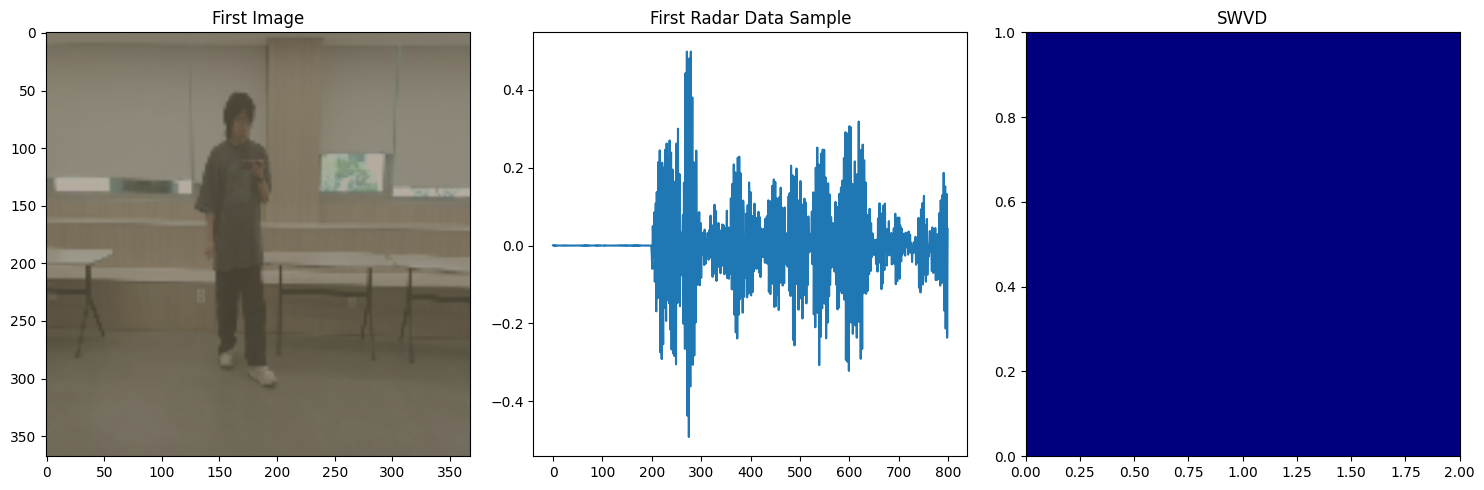

torch.Size([4, 1, 800])

In [4]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from dataload import *
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from model import *
from PIL import Image, ImageFilter


os.environ["TOKENIZERS_PARALLELISM"] = "false"




# 이미지 및 레이더 데이터셋 경로 설정
image_data_path = '/home/yunkwan/project/radarclip/data_train/image'
radar_data_path = '/home/yunkwan/project/radarclip/data_train/radar'
sWVD_data_path = '/home/yunkwan/project/radarclip/data_train/swvd_folder'
# # 이미지 및 레이더 데이터셋 경로 설정
# image_data_path = '/home/yunkwan/project/radarclip/data_test/image'
# radar_data_path = '/home/yunkwan/project/radarclip/data_test/radar'
# sWVD_data_path = '/home/yunkwan/project/radarclip/data_test/swvd_folder'

# 이미지 데이터 전처리 및 변환 정의
def gray_to_rgb(img):
    return img.repeat(3, 1, 1)


# Edge filter를 적용하는 함수
def apply_edge_filter(image):
    return image.filter(ImageFilter.FIND_EDGES)

image_transform = transforms.Compose([
    #transforms.RandomResizedCrop((224, 224)),  # 랜덤하게 크롭 후 리사이즈
    # transforms.Lambda(apply_edge_filter),
    # transforms.RandomRotation(degrees=(0, 0)),  # 랜덤하게 회전 (예: -30도에서 30도 사이)
    transforms.ToTensor(),  # 이미지를 Tensor로 변환
    # transforms.Grayscale(num_output_channels=1),  # 이미지를 흑백으로 변환
    # transforms.Lambda(lambda x: gray_to_rgb(x)),  # 1채널 흑백 이미지를 3채널로 복사
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # 이미지 정규화
    # transforms.RandomCrop((200, 200)),  # 랜덤하게 크롭
    transforms.Resize((368, 368)),
])



# 커스텀 데이터셋 생성
radar_range =[200,1000]
radar_normalize= False
paired_dataset = PairedDataset(image_root_dir=image_data_path, radar_root_dir=radar_data_path,sWVD_root_dir= sWVD_data_path,radar_range=radar_range ,transform=image_transform, radar_normalize= radar_normalize)

# 데이터 로더 생성
paired_dataloader = DataLoader(paired_dataset, batch_size=4, shuffle=True, num_workers=0)

# 데이터 로더에서 첫 배치를 가져옴
image_batch, radar_batch, image_path_batch, radar_path_batch, WVD_batch = next(iter(paired_dataloader))
images, radars,image_path,radar_path,WVD = image_batch, radar_batch,image_path_batch, radar_path_batch, WVD_batch

# 이미지 역정규화 함수 정의
def imshow(img):
    img = img * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)  # 역정규화
    npimg = img.numpy()
    npimg = np.clip(npimg, 0, 1) 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def imshow_nping(img):
    img = img * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)  # 역정규화
    npimg = img.numpy()
    npimg = np.clip(npimg, 0, 1) 
    npimg = np.transpose(npimg, (1, 2, 0))
    return npimg

# 첫 번째 페어를 시각화
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# imshow(images[0])
img = imshow_nping(images[0])
plt.imshow(img)
plt.title('First Image')

plt.subplot(1, 3, 2)
if radar_normalize == True:
    lim = 1
    plt.plot(radars[0].flatten())
else:
    lim = 0.01
    plt.plot(radars[0].flatten())
plt.title('First Radar Data Sample')
# plt.ylim(-lim, lim)

freq_range = np.linspace(0, 1, WVD[0].shape[0])
extent = [0, WVD[0].shape[1], freq_range[0], freq_range[-1]]
plt.subplot(1, 3, 3)
plt.imshow(np.abs(WVD[0]),aspect='auto', extent=extent, cmap='jet', origin='lower')
plt.title('SWVD')



plt.tight_layout()
plt.show()

radars[0,0,:].shape
radars.shape

# radars

In [5]:
# import numpy as np
# import torch
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # Collect all radar data
# all_radars = []

# for _, radars, _, _, _ in paired_dataloader:
#     radars_np = radars.cpu().numpy()
#     for radar in radars_np:
#         all_radars.append(radar.flatten())

# all_radars = np.array(all_radars)

# # Apply PCA
# n_components = 2
# pca = PCA(n_components=n_components)
# radars_pca = pca.fit_transform(all_radars)

# # Plot the PCA-transformed data
# plt.figure(figsize=(10, 6))
# plt.scatter(radars_pca[:300, 0], radars_pca[:300, 1], color='r')
# plt.title('PCA Transformed Radar Data')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()


In [6]:
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image

# CLIP 모델과 프로세서를 로드합니다
CLIP = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# 테스트 이미지를 불러옵니다
image = images[0]

# 테스트 텍스트를 정의합니다
text = "a description of the image"

# 입력을 프로세싱합니다
inputs = processor(text=[text], images=image, return_tensors="pt", padding=True)


# 모델을 통해 예측을 수행합니다
outputs = CLIP(**inputs)

# 이미지와 텍스트의 유사성을 계산합니다
logits_per_image = outputs.logits_per_image # 이미지-텍스트 유사성
logits_per_text = outputs.logits_per_text   # 텍스트-이미지 유사성

# 소프트맥스를 통해 확률을 계산합니다
probs = logits_per_image.softmax(dim=1) # 이미지의 경우

print("Logits per image:", logits_per_image)
print("Logits per text:", logits_per_text)
print("Probs:", probs)
# 이미지 전처리
image_inputs = processor(images=image, return_tensors="pt")

# 이미지 임베딩 계산
image_features = CLIP.get_image_features(**image_inputs)



In [ ]:
import torch
from PIL import Image
from transformers import ViTFeatureExtractor, AutoTokenizer, CLIPFeatureExtractor, AutoModel, AutoModelForCausalLM
from transformers.models.auto.configuration_auto import AutoConfig
from smallcap.src.vision_encoder_decoder import SmallCap, SmallCapConfig
from smallcap.src.gpt2 import ThisGPT2Config, ThisGPT2LMHeadModel
from smallcap.src.utils import prep_strings, postprocess_preds
import json
from smallcap.src.retrieve_caps import *
import faiss
import torchvision.transforms as transforms

device = "cuda" if torch.cuda.is_available() else "cpu"

# 특징 추출기 로드
retrieval_model, feature_extractor_retrieval = clip.load("ViT-B/32", device=device) #528 size 224



In [ ]:
# load model
AutoConfig.register("this_gpt2", ThisGPT2Config)
AutoModel.register(ThisGPT2Config, ThisGPT2LMHeadModel)
AutoModelForCausalLM.register(ThisGPT2Config, ThisGPT2LMHeadModel)
AutoConfig.register("smallcap", SmallCapConfig)
AutoModel.register(SmallCapConfig, SmallCap)
model = AutoModel.from_pretrained("Yova/SmallCap7M")
model= model.to(device)

Some weights of SmallCap were not initialized from the model checkpoint at Yova/SmallCap7M and are newly initialized: ['encoder_radar.layer4.2.bn1.running_mean', 'encoder_radar.layer3.2.bn1.running_mean', 'encoder_radar.layer3.13.conv2.weight', 'encoder_radar.layer3.0.bn2.bias', 'encoder_radar.layer3.10.conv3.weight', 'encoder_radar.layer3.10.bn1.running_var', 'encoder_radar.layer3.11.conv2.weight', 'encoder_radar.layer3.20.bn3.running_mean', 'encoder_radar.layer2.0.downsample.0.weight', 'encoder_radar.layer2.1.conv3.weight', 'encoder_radar.layer3.9.bn1.running_mean', 'encoder_radar.layer3.5.bn3.running_mean', 'encoder_radar.layer3.4.bn2.running_mean', 'encoder_radar.layer1.0.downsample.1.weight', 'encoder_radar.layer3.15.bn2.num_batches_tracked', 'encoder_radar.layer1.0.bn3.num_batches_tracked', 'encoder_radar.layer2.3.bn2.num_batches_tracked', 'encoder_radar.layer3.3.bn3.weight', 'encoder_radar.layer3.20.bn2.weight', 'encoder_radar.layer2.2.bn2.weight', 'encoder_radar.layer4.0.bn3.bi

In [ ]:
# import torch
# from torch import nn
# from transformers import PreTrainedModel, BertConfig, BertModel

# class RadarPatchEmbedding(nn.Module):
#     def __init__(self, patch_size, hidden_size):
#         super(RadarPatchEmbedding, self).__init__()
#         self.patch_size = patch_size
#         self.hidden_size = hidden_size
#         self.projection = nn.Linear(patch_size, hidden_size)

#     def forward(self, x):
#         # x의 크기는 (batch_size, 1, seq_len)
#         batch_size, channels, seq_len = x.shape
#         num_patches = seq_len // self.patch_size
#         x = x[:, :, :num_patches * self.patch_size]  # 패치 크기에 맞게 자르기
#         x = x.view(batch_size, num_patches, self.patch_size)  # (batch_size, num_patches, patch_size)
#         x = x.float()  # Linear 레이어 입력으로 변환
#         x = self.projection(x)  # (batch_size, num_patches, hidden_size)
#         return x

# class RadarTransformer(PreTrainedModel):
#     config_class = BertConfig
#     base_model_prefix = "bert"

#     def __init__(self, config):
#         super(RadarTransformer, self).__init__(config)
#         self.patch_embedding = RadarPatchEmbedding(config.patch_size, config.hidden_size)
#         self.position_embeddings = nn.Embedding(config.max_position_embeddings, config.hidden_size)
#         self.encoder = BertModel(config)
#         self.layer_norm = nn.LayerNorm(config.hidden_size)

#     def forward(self, input_ids):
#         # 패치 임베딩 생성
#         embeddings = self.patch_embedding(input_ids)
#         # 포지셔널 임베딩 추가
#         position_ids = torch.arange(embeddings.size(1), device=input_ids.device).unsqueeze(0).expand(embeddings.size(0), -1)
#         position_embeddings = self.position_embeddings(position_ids)
#         embeddings += position_embeddings

#         # Transformer 인코더 통과
#         encoder_outputs = self.encoder(inputs_embeds=embeddings)
#         sequence_output = encoder_outputs.last_hidden_state

#         # 출력 정규화
#         sequence_output = self.layer_norm(sequence_output)
#         return sequence_output

# # Config 정의
# class RadarConfig(BertConfig):
#     def __init__(self, patch_size, hidden_size=768, max_position_embeddings=50, **kwargs):
#         super().__init__(**kwargs)
#         self.patch_size = patch_size
#         self.hidden_size = hidden_size
#         self.max_position_embeddings = max_position_embeddings

# # radars 데이터 샘플
# # radars = torch.rand(10, 1, 1600).to("cuda")  # 예: (batch_size, channels, seq_len)
# print(radars.shape)
# # 패치 크기를 seq_len에 맞춰 설정 (여기서는 32로 가정)
# seq_len = radars.shape[2]
# num_patches = 50
# patch_size = seq_len // num_patches  # 패치 크기 조정

# # 모델 초기화
# config = RadarConfig(patch_size=patch_size)
# encoder_search_resnet1D_768 = RadarTransformer(config).to("cuda")



# # 모델 인코딩
# outputs = encoder_search_resnet1D_768(radars.to(device))

# # 출력 크기 확인
# print(outputs.shape)  # 예상 출력: torch.Size([10, 50, 768])


In [ ]:
import torch
import clip
from torchvision import transforms
from PIL import Image
# model.encoder의 파라미터를 고정
for param in model.encoder.parameters():
    param.requires_grad = False
    
    
# Define preprocessing function
def prepro_image_features(images, retrieval_model, device, batch_size=2):
    resize_transform = transforms.Resize((224, 224))
    resized_images = torch.stack([resize_transform(image) for image in images])
    resized_images = resized_images.to(device).float()#.half()
    
    image_features_list = []
    
    for i in range(0, len(resized_images), batch_size):
        batch_images = resized_images[i:i + batch_size]
        torch.cuda.empty_cache()
        
        with torch.no_grad():
            features = model.encoder(batch_images.to(device))
            image_features_batch = features.last_hidden_state.reshape(-1,50,768)

        image_features_list.append(image_features_batch)

    image_features = torch.concat(image_features_list, axis=0)
    
    return torch.Tensor(image_features).to(device).float()

# Example usage
ran = torch.randn(3, 3, 224, 224)  # Replace with your actual images
image_features = prepro_image_features(images, retrieval_model, device, batch_size=32)
print(image_features.shape)


torch.Size([4, 50, 768])


In [ ]:
from model import *
from model import *
import torch.backends.cudnn as cudnn

# CUDA 및 CUDNN 설정 조정
cudnn.enabled = True
cudnn.benchmark = True

device = "cuda" if torch.cuda.is_available() else "cpu"
# 1D 데이터 예제
# 배치 크기 x 채널 수 x 데이터 길이
input_data = radars.to(device)
print(input_data.shape)
# 1D ResNet-50 v2 모델 인스턴스 생성
# encoder_search_resnet1D_1024 = ResNet1D(Bottleneck1D, [3, 4, 6, 3], 1024)
# encoder_search_resnet1D_768 = ResNet1D(Bottleneck1D, [3, 4, 6, 3], 768*50)

encoder_search_resnet1D_1024  = ResNet1D_101(Bottleneck1D_101, [3, 4, 23, 3], 1024)

encoder_search_resnet1D_768 = ResNet1D_101(Bottleneck1D_101, [3, 4, 23, 3], 768*50)


encoder_search_resnet1D_1024.to(device)
encoder_search_resnet1D_768.to(device)
output = encoder_search_resnet1D_1024(input_data)
print(output.shape)
output = encoder_search_resnet1D_768(input_data)
print(output.shape)

torch.Size([4, 1, 800])
torch.Size([4, 1024])
torch.Size([4, 38400])


In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset
import random

# 데이터셋 인덱스 생성
indices = list(range(len(paired_dataset)))
train_indices, temp_indices = train_test_split(indices, test_size=0.2, random_state=42)
val_indices, test_indices = train_test_split(temp_indices, test_size=0.5, random_state=42)

# Subset을 사용하여 훈련, 검증 및 테스트 데이터셋 생성
train_dataset = Subset(paired_dataset, train_indices)
val_dataset = Subset(paired_dataset, val_indices)
test_dataset = Subset(paired_dataset, test_indices)

# DataLoader 설정
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# 데이터셋 크기 확인
print(f'Train dataset size: {len(train_dataset)}')
print(f'Validation dataset size: {len(val_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')


Train dataset size: 18347
Validation dataset size: 2293
Test dataset size: 2294


In [ ]:
# 768 학습

# 모델, 손실 함수, 최적화기 정의
import torch.optim as optim
import wandb
from tqdm import tqdm
from PIL import Image
import torch.nn as nn

# WandB 초기화
wandb.init(project="encoder_search_resnet1D_768")

criterion = nn.MSELoss()
#cos similarity 사용
# criterion = nn.CosineSimilarity(dim=1)  # 벡터 간의 코사인 유사도 계산
# similarity_to_loss = lambda x: 1 - x  # 코사인 유사도를 손실로 변환


# optimizer = optim.Adam(encoder_search_resnet1D_768.parameters(), lr=0.001)
optimizer = optim.Adam(encoder_search_resnet1D_768.parameters(), lr=0.001, weight_decay=1e-5) 
# paired_dataloader sklearn split train val test
device = "cuda" if torch.cuda.is_available() else "cpu"

# 학습 및 검증 루프
num_epochs = 100
early_stopping_patience = 5  # 개선되지 않는 에폭 수
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    encoder_search_resnet1D_768.train()
    running_loss = 0.0
    train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}")

    for images, radars,_,_,_ in train_loader_tqdm:
        images = images.to(device).float()
        radars = radars.to(device).float()
        optimizer.zero_grad()

        radars_features = encoder_search_resnet1D_768(radars)
        # images_features = CLIP.get_image_features(images)

        images_features = prepro_image_features(images, retrieval_model, device, batch_size=32)
        
        # print(radars_features.shape, images_features.shape)
        loss = criterion(radars_features.reshape(-1,50,768), images_features)
        # similarity = criterion(radars_features.reshape(-1,50,768), images_features)
        # loss = similarity_to_loss(similarity).mean() 

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        train_loader_tqdm.set_postfix(loss=running_loss / len(train_dataset))

    epoch_loss = running_loss / len(train_dataset)
    wandb.log({"train_loss": epoch_loss, "epoch": epoch + 1})

    # 검증 단계
    encoder_search_resnet1D_768.eval()
    val_loss = 0.0

    with torch.no_grad():
        for images, radars,_,_,_ in val_loader:
            images = images.to(device).float()
            radars = radars.to(device).float()

            radars_features = encoder_search_resnet1D_768(radars)
            # images_features = CLIP.get_image_features(images)
            images_features = prepro_image_features(images, retrieval_model, device, batch_size=32)

            loss = criterion(radars_features.reshape(-1,50,768), images_features)
            # similarity = criterion(radars_features.reshape(-1,50,768), images_features)
            # loss = similarity_to_loss(similarity).mean()  # 코사인 유사도를 손실로 변환


            val_loss += loss.item() * images.size(0)

    val_loss = val_loss / len(val_dataset)
    wandb.log({"val_loss": val_loss, "epoch": epoch + 1})

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}")
    
    # 조기 종료 조건 체크
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= early_stopping_patience:
        print(f"Early stopping triggered after {epoch + 1} epochs.")
        break

wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: kycl0131. Use `wandb login --relogin` to force relogin


Epoch 1/100: 100%|██████████| 287/287 [01:20<00:00,  3.55it/s, loss=0.0774]


Epoch 1/100, Train Loss: 0.0774, Val Loss: 0.0751


Epoch 2/100: 100%|██████████| 287/287 [01:20<00:00,  3.55it/s, loss=0.057] 


Epoch 2/100, Train Loss: 0.0570, Val Loss: 0.0587


Epoch 3/100: 100%|██████████| 287/287 [01:21<00:00,  3.53it/s, loss=0.0531]


Epoch 3/100, Train Loss: 0.0531, Val Loss: 0.0519


Epoch 4/100: 100%|██████████| 287/287 [01:21<00:00,  3.54it/s, loss=0.0491]


Epoch 4/100, Train Loss: 0.0491, Val Loss: 0.0499


Epoch 5/100: 100%|██████████| 287/287 [01:20<00:00,  3.56it/s, loss=0.0454]


Epoch 5/100, Train Loss: 0.0454, Val Loss: 0.0487


Epoch 6/100: 100%|██████████| 287/287 [01:19<00:00,  3.61it/s, loss=0.041] 


Epoch 6/100, Train Loss: 0.0410, Val Loss: 0.0422


Epoch 7/100: 100%|██████████| 287/287 [01:19<00:00,  3.62it/s, loss=0.036] 


Epoch 7/100, Train Loss: 0.0360, Val Loss: 0.0378


Epoch 8/100: 100%|██████████| 287/287 [01:20<00:00,  3.58it/s, loss=0.0329]


Epoch 8/100, Train Loss: 0.0329, Val Loss: 0.0324


Epoch 9/100: 100%|██████████| 287/287 [01:20<00:00,  3.55it/s, loss=0.0312]


Epoch 9/100, Train Loss: 0.0312, Val Loss: 0.0322


Epoch 10/100: 100%|██████████| 287/287 [01:22<00:00,  3.48it/s, loss=0.0302]


Epoch 10/100, Train Loss: 0.0302, Val Loss: 0.0294


Epoch 11/100: 100%|██████████| 287/287 [01:21<00:00,  3.52it/s, loss=0.029] 


Epoch 11/100, Train Loss: 0.0290, Val Loss: 0.0291


Epoch 12/100: 100%|██████████| 287/287 [01:21<00:00,  3.51it/s, loss=0.0281] 


Epoch 12/100, Train Loss: 0.0281, Val Loss: 0.0295


Epoch 13/100: 100%|██████████| 287/287 [01:22<00:00,  3.49it/s, loss=0.0274] 


Epoch 13/100, Train Loss: 0.0274, Val Loss: 0.0272


Epoch 14/100: 100%|██████████| 287/287 [01:21<00:00,  3.54it/s, loss=0.0267] 


Epoch 14/100, Train Loss: 0.0267, Val Loss: 0.0275


Epoch 15/100: 100%|██████████| 287/287 [01:22<00:00,  3.48it/s, loss=0.0264] 


Epoch 15/100, Train Loss: 0.0264, Val Loss: 0.0263


Epoch 16/100: 100%|██████████| 287/287 [01:22<00:00,  3.48it/s, loss=0.0257] 


Epoch 16/100, Train Loss: 0.0257, Val Loss: 0.0254


Epoch 17/100: 100%|██████████| 287/287 [01:20<00:00,  3.54it/s, loss=0.0254] 


Epoch 17/100, Train Loss: 0.0254, Val Loss: 0.0249


Epoch 18/100: 100%|██████████| 287/287 [01:22<00:00,  3.50it/s, loss=0.0251] 


Epoch 18/100, Train Loss: 0.0251, Val Loss: 0.0253


Epoch 19/100: 100%|██████████| 287/287 [01:21<00:00,  3.53it/s, loss=0.0248] 


Epoch 19/100, Train Loss: 0.0248, Val Loss: 0.0241


Epoch 20/100: 100%|██████████| 287/287 [01:22<00:00,  3.48it/s, loss=0.0246] 


Epoch 20/100, Train Loss: 0.0246, Val Loss: 0.0250


Epoch 21/100: 100%|██████████| 287/287 [01:21<00:00,  3.53it/s, loss=0.0242] 


Epoch 21/100, Train Loss: 0.0242, Val Loss: 0.0244


Epoch 22/100: 100%|██████████| 287/287 [01:22<00:00,  3.46it/s, loss=0.0239] 


Epoch 22/100, Train Loss: 0.0239, Val Loss: 0.0243


Epoch 23/100: 100%|██████████| 287/287 [01:21<00:00,  3.51it/s, loss=0.0238] 


Epoch 23/100, Train Loss: 0.0238, Val Loss: 0.0237


Epoch 24/100: 100%|██████████| 287/287 [01:20<00:00,  3.55it/s, loss=0.0236] 


Epoch 24/100, Train Loss: 0.0236, Val Loss: 0.0240


Epoch 25/100: 100%|██████████| 287/287 [01:22<00:00,  3.49it/s, loss=0.0234] 


Epoch 25/100, Train Loss: 0.0234, Val Loss: 0.0252


Epoch 26/100: 100%|██████████| 287/287 [01:20<00:00,  3.55it/s, loss=0.0231] 


Epoch 26/100, Train Loss: 0.0231, Val Loss: 0.0230


Epoch 27/100: 100%|██████████| 287/287 [01:21<00:00,  3.53it/s, loss=0.0233] 


Epoch 27/100, Train Loss: 0.0233, Val Loss: 0.0235


Epoch 28/100: 100%|██████████| 287/287 [01:20<00:00,  3.56it/s, loss=0.0231] 


Epoch 28/100, Train Loss: 0.0231, Val Loss: 0.0229


Epoch 29/100: 100%|██████████| 287/287 [01:20<00:00,  3.58it/s, loss=0.0228] 


Epoch 29/100, Train Loss: 0.0228, Val Loss: 0.0227


Epoch 30/100: 100%|██████████| 287/287 [01:19<00:00,  3.60it/s, loss=0.0228] 


Epoch 30/100, Train Loss: 0.0228, Val Loss: 0.0231


Epoch 31/100: 100%|██████████| 287/287 [01:21<00:00,  3.50it/s, loss=0.0227] 


Epoch 31/100, Train Loss: 0.0227, Val Loss: 0.0222


Epoch 32/100: 100%|██████████| 287/287 [01:21<00:00,  3.53it/s, loss=0.0226] 


Epoch 32/100, Train Loss: 0.0226, Val Loss: 0.0226


Epoch 33/100: 100%|██████████| 287/287 [01:21<00:00,  3.52it/s, loss=0.0224] 


Epoch 33/100, Train Loss: 0.0224, Val Loss: 0.0220


Epoch 34/100: 100%|██████████| 287/287 [01:22<00:00,  3.49it/s, loss=0.0223] 


Epoch 34/100, Train Loss: 0.0223, Val Loss: 0.0219


Epoch 35/100: 100%|██████████| 287/287 [01:21<00:00,  3.54it/s, loss=0.0222] 


Epoch 35/100, Train Loss: 0.0222, Val Loss: 0.0227


Epoch 36/100: 100%|██████████| 287/287 [01:20<00:00,  3.55it/s, loss=0.0222] 


Epoch 36/100, Train Loss: 0.0222, Val Loss: 0.0220


Epoch 37/100: 100%|██████████| 287/287 [01:22<00:00,  3.49it/s, loss=0.0221] 


Epoch 37/100, Train Loss: 0.0221, Val Loss: 0.0218


Epoch 38/100: 100%|██████████| 287/287 [01:22<00:00,  3.48it/s, loss=0.022]  


Epoch 38/100, Train Loss: 0.0220, Val Loss: 0.0213


Epoch 39/100: 100%|██████████| 287/287 [01:22<00:00,  3.47it/s, loss=0.0219] 


Epoch 39/100, Train Loss: 0.0219, Val Loss: 0.0227


Epoch 40/100: 100%|██████████| 287/287 [01:23<00:00,  3.43it/s, loss=0.0218] 


Epoch 40/100, Train Loss: 0.0218, Val Loss: 0.0213


Epoch 41/100: 100%|██████████| 287/287 [01:20<00:00,  3.56it/s, loss=0.0217] 


Epoch 41/100, Train Loss: 0.0217, Val Loss: 0.0212


Epoch 42/100: 100%|██████████| 287/287 [01:21<00:00,  3.51it/s, loss=0.0217] 


Epoch 42/100, Train Loss: 0.0217, Val Loss: 0.0214


Epoch 43/100: 100%|██████████| 287/287 [01:22<00:00,  3.46it/s, loss=0.0216] 


Epoch 43/100, Train Loss: 0.0216, Val Loss: 0.0217


Epoch 44/100: 100%|██████████| 287/287 [01:21<00:00,  3.52it/s, loss=0.0216] 


Epoch 44/100, Train Loss: 0.0216, Val Loss: 0.0220


Epoch 45/100: 100%|██████████| 287/287 [01:21<00:00,  3.51it/s, loss=0.0216] 


Epoch 45/100, Train Loss: 0.0216, Val Loss: 0.0214


Epoch 46/100: 100%|██████████| 287/287 [01:22<00:00,  3.46it/s, loss=0.0216] 


Epoch 46/100, Train Loss: 0.0216, Val Loss: 0.0213
Early stopping triggered after 46 epochs.


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
train_loss,█▅▅▄▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▅▅▅▄▃▂▂▂▂▂▂▂▁▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,46
train_loss,0.02155
val_loss,0.02129


In [ ]:
# 모델 저장
import os
model_save_path = "/home/yunkwan/project/radarclip/model_save"
model_save_path_encoder_search_resnet1D_768 = "/home/yunkwan/project/radarclip/model_save/encoder_search_resnet1D_768.pth"
if not os.path.exists(os.path.dirname(model_save_path)):
    os.makedirs(os.path.dirname(model_save_path))
    
torch.save(encoder_search_resnet1D_768.state_dict(), model_save_path_encoder_search_resnet1D_768)
print(f"Model saved to {model_save_path_encoder_search_resnet1D_768}")


Model saved to /home/yunkwan/project/radarclip/model_save/encoder_search_resnet1D_768.pth


In [ ]:
retrieval_model, feature_extractor_retrieval = clip.load("RN50x64", device=device)  #1024 size 448 
# model.encoder의 파라미터를 고정
# 모델의 모든 파라미터를 고정
for param in retrieval_model.parameters():
    param.requires_grad = False
def prepro_image_features(images, retrieval_model, device, batch_size=2):
    """
    Resize images to (448, 448) and extract features using the retrieval model.
    
    Parameters:
    images (torch.Tensor): A batch of images with shape (batch_size, 3, 224, 224).
    retrieval_model: The model used to extract image features.
    device (str): The device to perform computations on ("cpu" or "cuda").
    batch_size (int): The number of images to process in each smaller batch.
    
    Returns:
    np.ndarray: The extracted image features.
    """
    # Define the transformation to resize the images
    resize_transform = transforms.Resize((448, 448))
    
    # Apply the transformation to each image in the batch
    resized_images = torch.stack([resize_transform(image) for image in images])
    
    # Move the resized images to the device and use mixed precision
    resized_images = resized_images.to(device).float() #.half()
    
    # Process images in smaller batches to avoid memory overflow
    image_features_list = []
    
    for i in range(0, len(resized_images), batch_size):
        batch_images = resized_images[i:i + batch_size]
        # Clear cache to optimize memory
        torch.cuda.empty_cache()
        # 이미지 특징 추출
        with torch.no_grad():
            image_features_batch = retrieval_model.encode_image(batch_images) #.cpu().detach().numpy()
            # print(image_features_batch.shape)
        image_features_list.append(image_features_batch)
    
    # Combine all the batch features
    image_features = torch.concat(image_features_list, axis=0)
    
    return torch.Tensor(image_features).to(device).float()


images = torch.randn(10, 3, 64, 64)  # Replace with your actual images
# retrieval_model, _ = clip.load("RN50x64", device=device)

image_features = prepro_image_features(images, retrieval_model, device, batch_size=2)
print(image_features.shape) 

torch.Size([10, 1024])


In [ ]:
# 모델, 손실 함수, 최적화기 정의
import torch.optim as optim
import wandb
from tqdm import tqdm
from PIL import Image
import torch.nn as nn

# WandB 초기화
wandb.init(project="encoder_search_resnet1D_1024")

criterion = nn.MSELoss()
#cos similarity 사용
# criterion = nn.CosineSimilarity(dim=1)  # 벡터 간의 코사인 유사도 계산
# similarity_to_loss = lambda x: 1 - x  # 코사인 유사도를 손실로 변환


optimizer = optim.Adam(encoder_search_resnet1D_1024.parameters(), lr=0.001, weight_decay=1e-5)
# paired_dataloader sklearn split train val test


# 학습 및 검증 루프
num_epochs = 30
early_stopping_patience = 5  # 개선되지 않는 에폭 수
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    encoder_search_resnet1D_1024.train()
    running_loss = 0.0
    train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}")

    for images, radars,_,_,_ in train_loader_tqdm:
        images = images.to(device)
        radars = radars.to(device)
        optimizer.zero_grad()
        radars_features = encoder_search_resnet1D_1024(radars)
        # images_features = CLIP.get_image_features(images)

        images_features = prepro_image_features(images, retrieval_model, device, batch_size=32)
        # print(radars_features.shape, images_features.shape)
        loss = criterion(radars_features, images_features)
        # similarity = criterion(radars_features, images_features)
        # loss = similarity_to_loss(similarity).mean() 

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        train_loader_tqdm.set_postfix(loss=running_loss / len(train_dataset))

    epoch_loss = running_loss / len(train_dataset)
    wandb.log({"train_loss": epoch_loss, "epoch": epoch + 1})

    # 검증 단계
    encoder_search_resnet1D_1024.eval()
    val_loss = 0.0

    with torch.no_grad():
        for images, radars,_,_,_ in val_loader:
            images = images.to(device)
            radars = radars.to(device)  
            radars_features = encoder_search_resnet1D_1024(radars)
            # images_features = CLIP.get_image_features(images)
            images_features = prepro_image_features(images, retrieval_model, device, batch_size=32)

            loss = criterion(radars_features, images_features)
            # similarity = criterion(radars_features, images_features)
            # loss = similarity_to_loss(similarity).mean()  # 코사인 유사도를 손실로 변환


            val_loss += loss.item() * images.size(0)

    val_loss = val_loss / len(val_dataset)
    wandb.log({"val_loss": val_loss, "epoch": epoch + 1})

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}")
    
    
    # 조기 종료 조건 체크
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= early_stopping_patience:
        print(f"Early stopping triggered after {epoch + 1} epochs.")
        break

wandb.finish()

Epoch 1/30: 100%|██████████| 287/287 [04:23<00:00,  1.09it/s, loss=0.00725]


Epoch 1/30, Train Loss: 0.0073, Val Loss: 0.0053


Epoch 2/30: 100%|██████████| 287/287 [04:24<00:00,  1.09it/s, loss=0.00484]


Epoch 2/30, Train Loss: 0.0048, Val Loss: 0.0047


Epoch 3/30: 100%|██████████| 287/287 [04:25<00:00,  1.08it/s, loss=0.00444]


Epoch 3/30, Train Loss: 0.0044, Val Loss: 0.0044


Epoch 4/30: 100%|██████████| 287/287 [04:23<00:00,  1.09it/s, loss=0.00418]


Epoch 4/30, Train Loss: 0.0042, Val Loss: 0.0048


Epoch 5/30: 100%|██████████| 287/287 [04:24<00:00,  1.08it/s, loss=0.00394]


Epoch 5/30, Train Loss: 0.0039, Val Loss: 0.0038


Epoch 6/30: 100%|██████████| 287/287 [04:22<00:00,  1.09it/s, loss=0.0037] 


Epoch 6/30, Train Loss: 0.0037, Val Loss: 0.0038


Epoch 7/30: 100%|██████████| 287/287 [04:24<00:00,  1.09it/s, loss=0.00356]


Epoch 7/30, Train Loss: 0.0036, Val Loss: 0.0037


Epoch 8/30: 100%|██████████| 287/287 [04:25<00:00,  1.08it/s, loss=0.00344]


Epoch 8/30, Train Loss: 0.0034, Val Loss: 0.0034


Epoch 9/30: 100%|██████████| 287/287 [04:24<00:00,  1.09it/s, loss=0.00334]


Epoch 9/30, Train Loss: 0.0033, Val Loss: 0.0034


Epoch 10/30: 100%|██████████| 287/287 [04:24<00:00,  1.08it/s, loss=0.00327]


Epoch 10/30, Train Loss: 0.0033, Val Loss: 0.0035


Epoch 11/30: 100%|██████████| 287/287 [04:24<00:00,  1.08it/s, loss=0.0032] 


In [ ]:
# 모델 저장
import os
model_save_path = "/home/yunkwan/project/radarclip/model_save"
model_save_path_encoder_search_resnet1D_1024 = "/home/yunkwan/project/radarclip/model_save/encoder_search_resnet1D_1024.pth"
if not os.path.exists(os.path.dirname(model_save_path)):
    os.makedirs(os.path.dirname(model_save_path))
    
torch.save(encoder_search_resnet1D_1024.state_dict(), model_save_path_encoder_search_resnet1D_1024)
print(f"Model saved to {model_save_path_encoder_search_resnet1D_1024}")


Model saved to /home/yunkwan/project/radarclip/model_save/encoder_search_resnet1D_1024.pth


In [ ]:






# # 테스트 단계
# resnet1D = resnet50_1d()  # 모델 클래스의 인스턴스 생성
# resnet1D.load_state_dict(torch.load(model_save_path))
# resnet1D.eval()  # 모델을 평가 모드로 전환

# resnet1D.eval()
# test_loss = 0.0

# with torch.no_grad():
#     for images, radars,_,_ in test_loader:
#         radars_feature = resnet1D(radars)
#         images_features = prepro_image_features(images, retrieval_model, device, batch_size=2)
#         loss = criterion(radars_feature, images_features)
#         test_loss += loss.item() * images.size(0)

# test_loss = test_loss / len(test_dataset)


# print(f"Test Loss: {test_loss:.4f}")

In [ ]:
# #모델 세이브
# # 모델 저장
# import os
# import torch
# from model import *
# path = "/home/yunkwan/project/radarclip/model_save"
# model_save_encoding_path = "/home/yunkwan/project/radarclip/model_save/resnet1D_model.pth"
# model_save_decoding_path = "/home/yunkwan/project/radarclip/model_save/decoding.pth"
# if not os.path.exists(os.path.dirname(path)):
#     os.makedirs(os.path.dirname(path))
    
# torch.save(resnet1D.state_dict(), model_save_encoding_path)
# torch.save(decoder.state_dict(), model_save_decoding_path)

In [ ]:
# #모델 세이브
# # 모델 저장
# import os
# import torch
# from model import *
# path = "/home/yunkwan/project/radarclip/model_save"
# model_save_encoding_path = "/home/yunkwan/project/radarclip/model_save/resnet1D_model.pth"
# model_save_decoding_path = "/home/yunkwan/project/radarclip/model_save/decoding.pth"
# device = "cuda" if torch.cuda.is_available() else "cpu"

# resnet1D = resnet50_1d()  # 모델 클래스의 인스턴스 생성
# decoder = ResNet101Decoder( latent_dim=1024, img_channels=3,output_size=(224,224))
# resnet1D.load_state_dict(torch.load(model_save_encoding_path))
# resnet1D.eval() 
# decoder.load_state_dict(torch.load(model_save_decoding_path))
# decoder.eval()

# resnet1D.to(device)
# decoder.to(device)


In [ ]:
# # 테스트 단계
# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Image
# from dataload import *
# from torchvision import datasets, transforms
# from torch.utils.data import Dataset, DataLoader
# from sklearn.utils import shuffle
# test_loss = 0.0

# # 이미지 및 레이더 데이터셋 경로 설정
# test_image_data_path = '/home/yunkwan/project/radarclip/data_test/image'
# test_radar_data_path = '/home/yunkwan/project/radarclip/data_test/radar'

# #test_image_data_path = '/home/yunkwan/project/radarclip/data/image'
# #test_radar_data_path = '/home/yunkwan/project/radarclip/data/radar'
# criterion = nn.MSELoss()
# test_paired_dataset = PairedDataset(image_root_dir=test_image_data_path, radar_root_dir=test_radar_data_path,radar_range=radar_range, transform=image_transform)
# #shuffle dataset
# # test_paired_dataset = shuffle(test_paired_dataset)


# test_paired_dataloader = DataLoader(test_paired_dataset, batch_size=1, shuffle=True, num_workers=4)
# with torch.no_grad():
#     for images, radars,_,_ in test_paired_dataloader:
#     # image_path = "/home/yunkwan/project/radarclip/data_test/image/sit/Image_frame_1717501028552.png"
#     # radar_path = "/home/yunkwan/project/radarclip/data_test/radar/sit/Radar_frame_1717501028552.npy"        
#     # images = Image.open(image_path).convert('RGB')
#     # images = image_transform(images)

#     # radars = np.load(radar_path)
#     # radars = torch.Tensor(radars).to(device)
#     # images = torch.Tensor(images).to(device)
#     # radars = radars.reshape(-1,1,1488)
#     # images = images.unsqueeze(0)
#     # print(radars.shape,images.shape)
#         images = images.to(device)
#         radars = radars.to(device)
#         radars_feature = resnet1D(radars)
#         images_features = prepro_image_features(images, retrieval_model, device, batch_size=1).to(device)
#         loss = criterion(radars_feature, images_features)
#         test_loss += loss.item() * images.size(0)
#         break
#     test_loss = test_loss / len(test_dataset)
#     print(f"Test Loss: {test_loss:.4f}")
#     radar_img= decoder(radars_feature)
#     img_img = decoder(images_features)
    


# #tensor to image
# radar_img = radar_img.cpu()
# img_img = img_img.cpu()
# images = images.cpu()
# radar_img = np.squeeze(radar_img[0])
# img_img = np.squeeze(img_img[0])
# images = np.squeeze(images[0])

# radar_img= imshow_nping(radar_img)
# img_img = imshow_nping(img_img)
# images = imshow_nping(images)


# # radar_img = np.transpose(radar_img, (1, 2, 0))
# # img_img = np.transpose(img_img, (1, 2, 0))
# # images = np.transpose(images, (1, 2, 0))

# # radar_img = np.clip(radar_img, 0, 1)
# # img_img = np.clip(img_img, 0, 1)
# # images = np.clip(images, 0, 1)


# # plot 설정
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# # 각 subplot에 이미지 표시
# axes[0].imshow(radar_img)
# axes[0].set_title("Radar Image")
# axes[0].axis('off')

# axes[1].imshow(img_img)
# axes[1].set_title("Image Image")
# axes[1].axis('off')

# axes[2].imshow(images)
# axes[2].set_title("Original Image")
# axes[2].axis('off')

# # 전체 plot 표시
# plt.tight_layout()
# plt.show()
# plt.plot(radars.cpu().numpy()[0].reshape(radar_range[1]-radar_range[0]))



In [ ]:
# # 모델, 손실 함수, 최적화기 정의
# import torch.optim as optim
# import wandb
# from tqdm import tqdm
# from PIL import Image
# import torch.nn as nn
# wandb.init(project="resnet-1d")
# # 손실 함수 및 최적화기 정의
# criterion = nn.MSELoss()
# optimizer = optim.Adam(list(resnet1D.parameters()) + list(decoder.parameters()), lr=0.001)


# # 학습 및 검증 루프
# num_epochs = 3000


# for epoch in range(num_epochs):
#     resnet1D.train()
#     decoder.train()
#     running_loss = 0.0
#     running_decoder_loss = 0.0
#     running_encoder_loss = 0.0
#     train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}")

#     for images, radars, _, _ in train_loader_tqdm:
#         images, radars = images.to(device), radars.to(device)
#         optimizer.zero_grad()
        
#         radars_features = resnet1D(radars)
#         images_features = prepro_image_features(images, retrieval_model, device, batch_size=2).to(device)
        
#         # 원본 이미지 복구
#         reconstructed_images = decoder(radars_features)
#         reconstruction_loss = criterion(reconstructed_images, images)
        
#         feature_loss = criterion(radars_features, images_features)
#         loss = feature_loss + reconstruction_loss

#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item() * images.size(0)
#         running_decoder_loss += reconstruction_loss.item() * images.size(0)
#         running_encoder_loss += feature_loss.item() * images.size(0)
#         train_loader_tqdm.set_postfix(loss=running_loss / len(train_dataset), encoder_loss =running_encoder_loss/ len(train_dataset) ,decoder_loss=running_decoder_loss / len(train_dataset))

#     epoch_loss = running_loss / len(train_dataset)
#     epoch_decoder_loss = running_decoder_loss / len(train_dataset)
#     epoch_encoder_loss = running_encoder_loss / len(train_dataset)
#     wandb.log({"train_loss": epoch_loss,"encoder_loss": epoch_encoder_loss, "decoder_loss": epoch_decoder_loss, "epoch": epoch + 1})

#     # 검증 단계
#     resnet1D.eval()
#     decoder.eval()
#     val_loss = 0.0
#     val_decoder_loss = 0.0
#     val_encoder_loss = 0.0
#     with torch.no_grad():
#         for images, radars, _, _ in val_loader:
#             images, radars = images.to(device), radars.to(device)
#             radars_features = resnet1D(radars)
#             images_features = prepro_image_features(images, retrieval_model, device, batch_size=2).to(device)
            
#             reconstructed_images = decoder(radars_features)
#             reconstruction_loss = criterion(reconstructed_images, images)
#             feature_loss = criterion(radars_features, images_features)
#             loss = feature_loss  + reconstruction_loss

#             val_loss += loss.item() * images.size(0)
#             val_decoder_loss += reconstruction_loss.item() * images.size(0)
#             val_encoder_loss += feature_loss.item() * images.size(0)
#     val_loss = val_loss / len(val_dataset)
#     val_decoder_loss = val_decoder_loss / len(val_dataset)
#     val_encoder_loss = val_encoder_loss / len(val_dataset)
#     wandb.log({"val_loss": val_loss,"val_encoder_loss": val_encoder_loss, "val_decoder_loss": val_decoder_loss, "epoch": epoch + 1})

#     print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f},Encoder Train Loss: {epoch_encoder_loss:.4f}, Encoder Val Loss: {val_encoder_loss:.4f}, Decoder Train Loss: {epoch_decoder_loss:.4f}, Decoder Val Loss: {val_decoder_loss:.4f}")

# wandb.finish()